In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
#pip install statsmodels

In [4]:
#pip install scikit-learn

In [5]:
df = pd.read_csv(r'C:\Users\KSSEEB\OneDrive\Documents\Machine Learning\Linear Regression\income.data.csv')

In [6]:
df.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [7]:
df.tail()

,Unnamed: 0,income,happiness
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664
497,498,4.530545,3.710193


In [8]:
df.columns

Index(['Unnamed: 0', 'income', 'happiness'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   income      498 non-null    float64
 2   happiness   498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [10]:
df.shape

(498, 3)

In [11]:
df.drop(['Unnamed: 0'], axis = 1 , inplace = True)

In [12]:
df.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [13]:
df.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,498.0,4.466902,1.737527,1.506275,3.006256,4.423710,5.991913,7.481521
happiness,498.0,3.392859,1.432813,0.266044,2.265864,3.472536,4.502621,6.863388


income


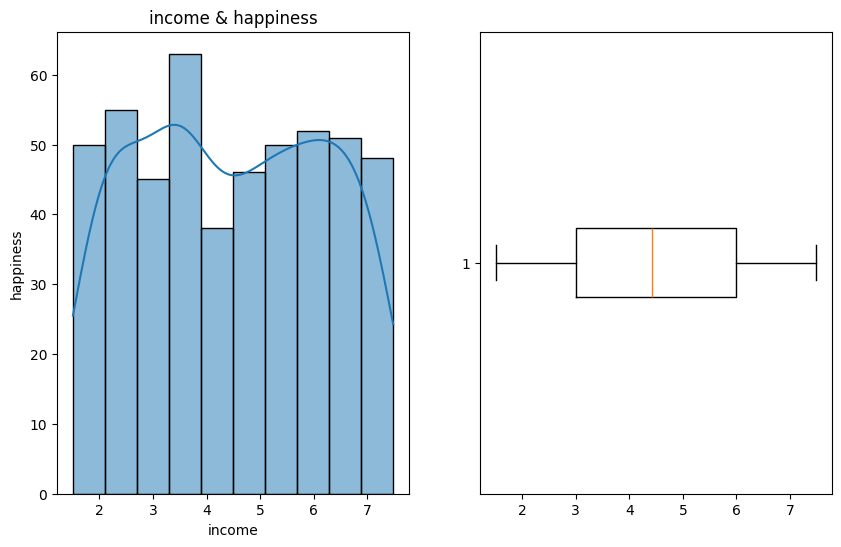

happiness


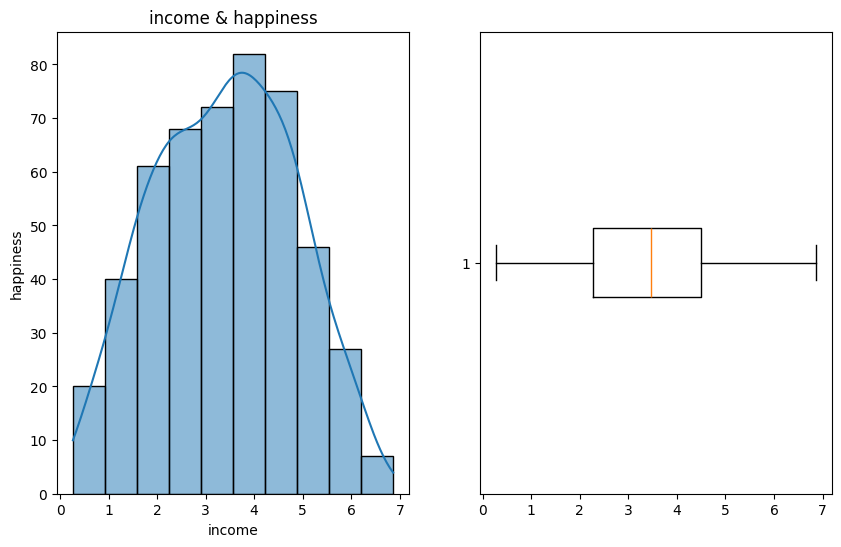

In [15]:
for i in df.columns:
    print(i)

    plt.figure(figsize=(10,6))

    plt.subplot(1,2,1)
    sns.histplot(df[i], bins=10, kde=True)
    plt.title('income & happiness')
    plt.xlabel('income')
    plt.ylabel('happiness')

    plt.subplot(1,2,2)
    plt.boxplot(df[i],vert=False)
    plt.show()